# Missing Value 처리하기

In [14]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,,8.0
10.0, 11.0, 12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [15]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [16]:
df.dropna(axis=0)
# x축 방향으로 이상치 존재시 row 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [17]:
df.dropna(axis=1)
# y축 방향으로 이상치 존재시 column 제거

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [18]:
df.dropna(how='all')
# 모든 행들이 NaN일때만 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [19]:
df.dropna(thresh=4)
# 행의 실제 값이 4개보다 적으면 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [20]:
df.dropna(subset=['C'])
# 'C' 열에 이상치 있는 행만을 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# Imputing missing values

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [22]:
df.fillna(df.mean())
# scikit-learn 이나 pandas로 평균을 이용한 imputing 가능

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# Dealing Category Data

In [23]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [25]:
size_mapping = {'XL' : 3, 'L': 2, 'M' : 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [26]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)
df['size']
# Ordinal Category data의 경우 직접 변환, 역변환 함수를 지정해주어야함

0    1
1    2
2    3
Name: size, dtype: int64

In [27]:
import numpy as np
class_mapping = {label : idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [28]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [29]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [31]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [32]:
class_le.inverse_transform(y)
# scikit-learn 이용시 편하게 nominal category data에 대해 label encoding 가능

array(['class2', 'class1', 'class2'], dtype=object)

In [33]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1, 1)).toarray()

# 첫번째 열에 대해 원핫인코딩 완료

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [35]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

# 0번째 열인 color를 제외하곤 size와 price는 그대로 유지되고, color는 원핫인코딩 진행됨

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [36]:
pd.get_dummies((df[['price', 'color', 'size']]))
# data가 문자열인 경우 자동으로 알아서 onehot 인코딩 해서 제공해줌

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [37]:
pd.get_dummies(df[['price', 'size', 'color']], drop_first=True)
# drop_first = True를 통해 다중공산성 문제 어느정도 해결가능

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [38]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

# ColumnTransformer를 통해 한번에 변환할때 미리 OneHotEncoder 객체를 만들어 drop_first를 하는 거도 가능

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

# Train, Test set Serperate

In [41]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [42]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [46]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean())/ex.std())
print('normalized:', (ex - ex.min())/(ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [47]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Selecting meaningful features

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C = 1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [49]:
lr.intercept_

array([-1.26363856, -1.21555069, -2.37032045])

In [50]:
lr.coef_

array([[ 1.24623447,  0.18015428,  0.74501403, -1.16231377,  0.        ,
         0.        ,  1.16197652,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55465493,  2.50920413],
       [-1.53919587, -0.38516985, -0.99551097,  0.36347796, -0.05882933,
         0.        ,  0.66701553,  0.        ,  0.        , -1.93164755,
         1.23857645,  0.        , -2.23338121],
       [ 0.13592492,  0.16849849,  0.35719629,  0.        ,  0.        ,
         0.        , -2.43789675,  0.        ,  0.        ,  1.56335793,
        -0.81916691, -0.49272587,  0.        ]])

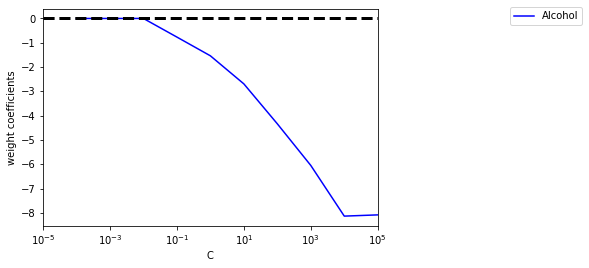

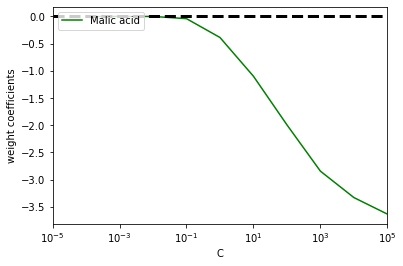

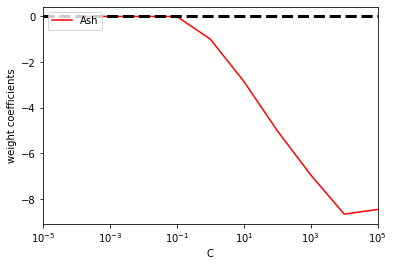

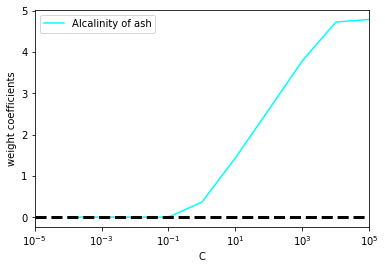

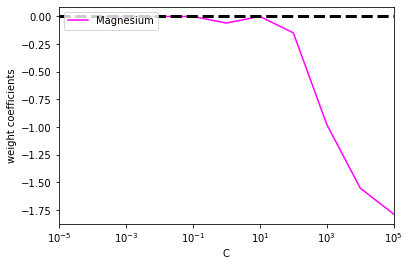

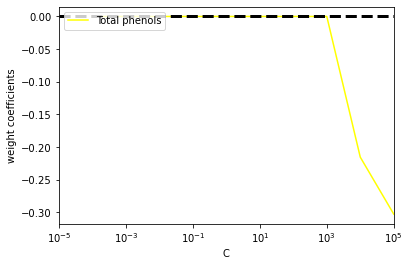

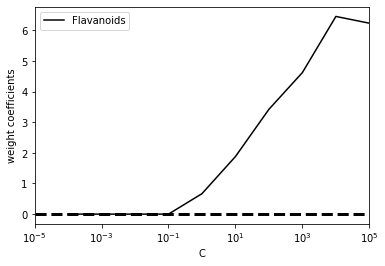

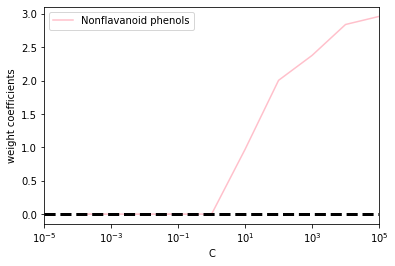

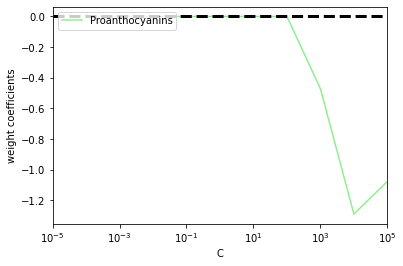

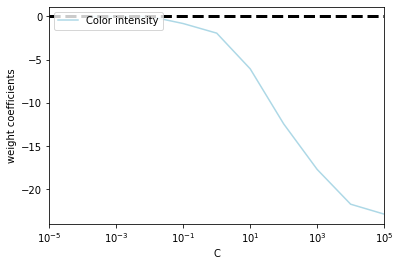

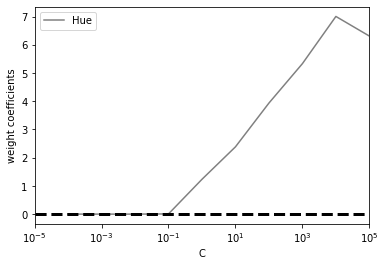

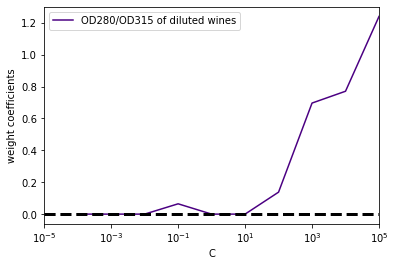

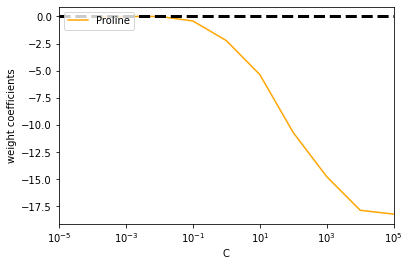

In [51]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C = 10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color = color)
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    plt.xlim([10**(-5), 10**(5)])
    plt.ylabel('weight coefficients')
    plt.xlabel('C')
    plt.xscale('log')
    plt.legend(loc = 'upper left')
    ax.legend(loc = 'upper left', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
    plt.show()

# Sequential feature selection algorithms

In [57]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [58]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

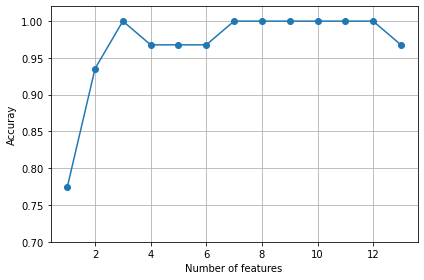

In [59]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuray')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [60]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [62]:
knn.fit(X_train_std, y_train)
print('Trainning Accuracy:', knn.score(X_train_std, y_train))
print('Test Accuracy:', knn.score(X_test_std, y_test))

Trainning Accuracy: 0.967741935483871
Test Accuracy: 0.9629629629629629


In [63]:
knn.fit(X_train_std[:, k3], y_train)
print('Trainning Accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test Accuracy:', knn.score(X_test_std[:, k3], y_test))

Trainning Accuracy: 0.9516129032258065
Test Accuracy: 0.9259259259259259


# Feature Selection by RandomForest Algorithm

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


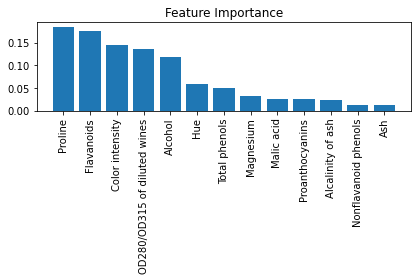

In [69]:
from sklearn.ensemble import RandomForestClassifier

feature_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' %(f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), labels=feature_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [71]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'creterion:', X_selected.shape[1])

Number of features that meet this threshold creterion: 5


In [73]:
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f+1, 30, feature_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
